In [1]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipywidgets import interact, IntSlider

In [73]:
# Creación del conjunto de datos independiente x
x = np.array(range(1, 11))
np.random.seed(10)

# Creación de y1 (distribución lineal)
pendiente = 2
intercepto = 3
ruido = np.random.randn(len(x)) * 2  # Ruido aleatorio
y1 = pendiente * x + intercepto + ruido

# Creación de y2 (distribución cuadrática)
coef_cuadratico = 1
coef_lineal = 2
intercepto = 3
ruido = np.random.randn(len(x)) * 20  # Ruido aleatorio más grande
y2 = coef_cuadratico * x**2 + coef_lineal * x + intercepto + ruido

# Creación de y3 (distribución sinusoidal)
amplitud = 3
frecuencia = 0.5
ruido = np.random.randn(len(x)) * 2  # Ruido aleatorio
y3 = amplitud * np.sin(frecuencia * x) + ruido

In [74]:
print(y1)
print()
print(y2)
print()
print(y3)

[ 7.66317301  8.43055795  5.90919942 10.9832323  14.24267195 13.55982888
 17.53102317 19.21709705 21.00858286 22.65079958]

[ 14.6605238   35.06074748  -1.30131341  47.56548156  42.5726026
  59.90275226  43.26795576  85.70273757 131.69074004 101.40390228]

[-2.51717995 -0.96233164  3.52462529  7.49782694  4.04279894  3.76860445
 -0.85405125  0.52558527 -3.47508633 -1.65036445]


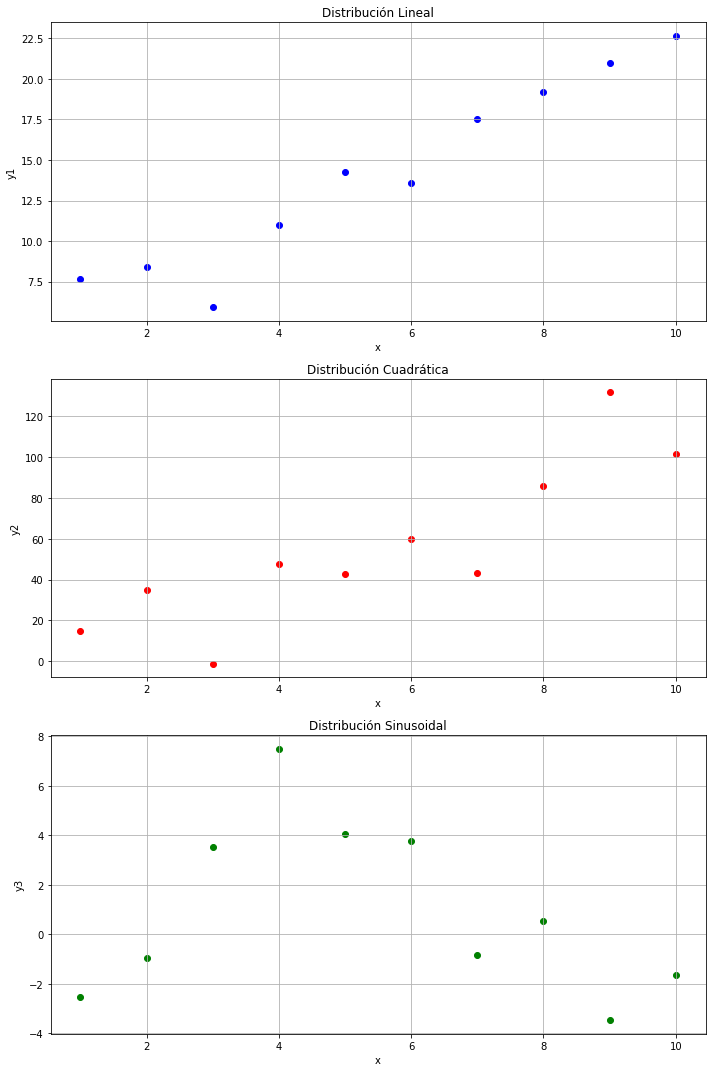

In [59]:
# Visualización
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
plt.scatter(x, y1, color='blue')
plt.title("Distribución Lineal")
plt.xlabel("x")
plt.ylabel("y1")
plt.grid()

plt.subplot(3, 1, 2)
plt.scatter(x, y2, color='red')
plt.title("Distribución Cuadrática")
plt.xlabel("x")
plt.ylabel("y2")
plt.grid()

plt.subplot(3, 1, 3)
plt.scatter(x, y3, color='green')
plt.title("Distribución Sinusoidal")
plt.xlabel("x")
plt.ylabel("y3")
plt.grid()

plt.tight_layout()
plt.show()

In [60]:
# Cálculo de la correlación de Pearson
corr_coef_y1, _ = stats.pearsonr(x, y1)
corr_coef_y2, _ = stats.pearsonr(x, y2)
corr_coef_y3, _ = stats.pearsonr(x, y3)

print("Coeficiente de correlación entre x y y1:", corr_coef_y1)
print("Coeficiente de correlación entre x y y2:", corr_coef_y2)
print("Coeficiente de correlación entre x y y2:", corr_coef_y3)

Coeficiente de correlación entre x y y1: 0.9651266111607985
Coeficiente de correlación entre x y y2: 0.8660437975211178
Coeficiente de correlación entre x y y2: -0.2601403241741653


In [61]:
# Cálculo del coeficiente de correlación de Spearman
spearman_corr_y1, _ = stats.spearmanr(x, y1)
spearman_corr_y2, _ = stats.spearmanr(x, y2)
spearman_corr_y3, _ = stats.spearmanr(x, y3)

print("Coeficiente de correlación de Spearman entre x y y1:", spearman_corr_y1)
print("Coeficiente de correlación de Spearman entre x y y2:", spearman_corr_y2)
print("Coeficiente de correlación de Spearman entre x y y2:", spearman_corr_y3)


Coeficiente de correlación de Spearman entre x y y1: 0.9515151515151514
Coeficiente de correlación de Spearman entre x y y2: 0.8909090909090909
Coeficiente de correlación de Spearman entre x y y2: -0.19999999999999998


In [62]:
def calcular_parametros_lineales(x, y):
    n = len(x)
    x_media = np.mean(x)
    y_media = np.mean(y)

    # Calculo de la pendiente (beta_1)
    numerador = sum((x - x_media) * (y - y_media))
    denominador = sum((x - x_media) ** 2)
    beta_1 = numerador / denominador

    # Calculo del intercepto (beta_0)
    beta_0 = y_media - beta_1 * x_media

    return beta_0, beta_1

def predecir_y(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

# Para y1
beta_0_y1, beta_1_y1 = calcular_parametros_lineales(x, y1)
y1_predicha = predecir_y(x, beta_0_y1, beta_1_y1)

# Para y2
beta_0_y2, beta_1_y2 = calcular_parametros_lineales(x, y2)
y2_predicha = predecir_y(x, beta_0_y2, beta_1_y2)

# Para y3
beta_0_y3, beta_1_y3 = calcular_parametros_lineales(x, y3)
y3_predicha = predecir_y(x, beta_0_y3, beta_1_y3)

# Cálculo de residuales
residuales_y1 = y1 - y1_predicha
residuales_y2 = y2 - y2_predicha
residuales_y3 = y3 - y3_predicha

print("Residuales de y1:", residuales_y1)
print()
print("Residuales de y2:", residuales_y2)
print()
print("Residuales de y3:", residuales_y3)

Residuales de y1: [ 1.95541543  0.85349836 -3.53716218 -0.3324313   1.05770634 -1.49443874
  0.60745354  0.42422542  0.34640922  0.11932393]

Residuales de y2: [ 10.33222484  19.23815651 -28.61819638   8.75430658  -7.73286439
  -1.89700674 -30.02609524   0.91439455  35.40810501  -6.37302475]

Residuales de y3: [-4.87394011 -3.01537681  1.7752951   6.05221174  2.90089872  2.93041922
 -1.3885215   0.29483    -3.40212661 -1.27368975]


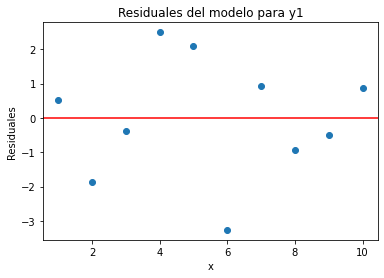

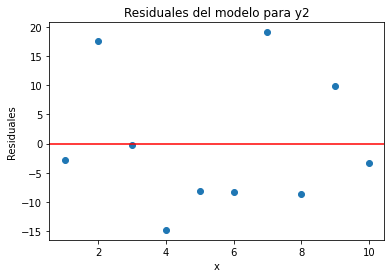

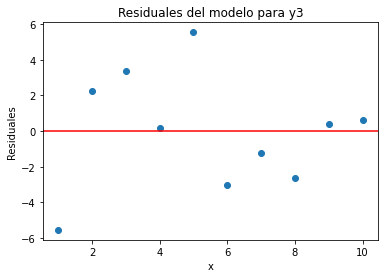

In [57]:
# Función para graficar los residuales
def graficar_residuales(x, residuales, titulo):
    plt.scatter(x, residuales)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title(f"Residuales del modelo para {titulo}")
    plt.xlabel("x")
    plt.ylabel("Residuales")
    plt.show()

# Graficar los residuales para y1
graficar_residuales(x, residuales_y1, "y1")

# Graficar los residuales para y2
graficar_residuales(x, residuales_y2, "y2")

# Graficar los residuales para y3
graficar_residuales(x, residuales_y3, "y3")

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Normalización de los datos
x = (x - np.mean(x)) / np.std(x)
y1 = (y1 - np.mean(y1)) / np.std(y1)
y2 = (y2 - np.mean(y2)) / np.std(y2)
y3 = (y3 - np.mean(y3)) / np.std(y3)

def run_linear_regression_and_plot(x, y):
    # Parámetros iniciales y configuración
    beta_0 = 0
    beta_1 = 0
    learning_rate = 0.01
    epochs = 10000
    cost_history = []
    beta_0_history = []
    beta_1_history = []

    # Función de costo
    def compute_cost(beta_0, beta_1, x, y):
        m = len(y)
        total_cost = (1/(2*m)) * np.sum((beta_0 + beta_1 * x - y)**2)
        return total_cost

    # Gradiente descendente
    for epoch in range(epochs):
        y_pred = beta_0 + beta_1 * x
        residuals = y_pred - y
        beta_0_gradient = np.sum(residuals) / len(y)
        beta_1_gradient = np.sum(residuals * x) / len(y)
        beta_0 -= learning_rate * beta_0_gradient
        beta_1 -= learning_rate * beta_1_gradient

        if epoch % 100 == 0:
            cost = compute_cost(beta_0, beta_1, x, y)
            cost_history.append(cost)
            beta_0_history.append(beta_0)
            beta_1_history.append(beta_1)

    def plot_regression(epoch):
        plt.figure(figsize=(14, 7))
        plt.subplot(1, 2, 1)
        plt.scatter(x, y, color='blue', label='Datos')
        plt.plot(x, beta_0_history[epoch] + beta_1_history[epoch] * x, color='red', label='Ajuste Lineal')
        plt.title(f'Regresión Lineal - Época {epoch}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(cost_history[:epoch+1])
        plt.title('Convergencia de la Función de Costo')
        plt.xlabel('Época')
        plt.ylabel('Costo')
        plt.show()

    return plot_regression, cost_history, beta_0_history, beta_1_history

# Ejemplo de uso con y1
plot_regression_y1, cost_history_y1, beta_0_history_y1, beta_1_history_y1 = run_linear_regression_and_plot(x, y1)
interact(plot_regression_y1, epoch=IntSlider(min=0, max=len(cost_history_y1)-1, step=1, value=0, description='Época:'))

# Ejemplo de uso con y2
plot_regression_y2, cost_history_y2, beta_0_history_y2, beta_1_history_y2 = run_linear_regression_and_plot(x, y2)
interact(plot_regression_y2, epoch=IntSlider(min=0, max=len(cost_history_y2)-1, step=1, value=0, description='Época:'))

# Ejemplo de uso con y3
plot_regression_y3, cost_history_y3, beta_0_history_y3, beta_1_history_y3 = run_linear_regression_and_plot(x, y3)
interact(plot_regression_y3, epoch=IntSlider(min=0, max=len(cost_history_y3)-1, step=1, value=0, description='Época:'))


interactive(children=(IntSlider(value=0, description='Época:', max=99), Output()), _dom_classes=('widget-inter…

interactive(children=(IntSlider(value=0, description='Época:', max=99), Output()), _dom_classes=('widget-inter…

interactive(children=(IntSlider(value=0, description='Época:', max=99), Output()), _dom_classes=('widget-inter…

<function __main__.run_linear_regression_and_plot.<locals>.plot_regression(epoch)>

In [71]:
print(cost_history_y1[-1])
print()
print(cost_history_y2[-1])
print()
print(cost_history_y3[-1])

0.034265312214636544

0.12498407038760054

0.46616350586928024


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Función para calcular las métricas
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae

# Calcula las predicciones finales para y1, y2 y y3
y1_pred = beta_0_history_y1[-1] + beta_1_history_y1[-1] * x
y2_pred = beta_0_history_y2[-1] + beta_1_history_y2[-1] * x
y3_pred = beta_0_history_y3[-1] + beta_1_history_y3[-1] * x

# Calcula y muestra las métricas para cada conjunto de datos
metrics_y1 = calculate_metrics(y1, y1_pred)
metrics_y2 = calculate_metrics(y2, y2_pred)
metrics_y3 = calculate_metrics(y3, y3_pred)

print(f"y1 - R²: {metrics_y1[0]}, MSE: {metrics_y1[1]}, RMSE: {metrics_y1[2]}, MAE: {metrics_y1[3]}")
print(f"y2 - R²: {metrics_y2[0]}, MSE: {metrics_y2[1]}, RMSE: {metrics_y2[2]}, MAE: {metrics_y2[3]}")
print(f"y3 - R²: {metrics_y3[0]}, MSE: {metrics_y3[1]}, RMSE: {metrics_y3[2]}, MAE: {metrics_y3[3]}")


y1 - R²: 0.931469375570727, MSE: 0.06853062442927309, RMSE: 0.2617835449933267, MAE: 0.19284093030804883
y2 - R²: 0.750031859224799, MSE: 0.24996814077520108, RMSE: 0.4999681397601262, MAE: 0.3916283297333518
y3 - R²: 0.06767298826143975, MSE: 0.9323270117385605, RMSE: 0.9655708217104328, MAE: 0.8322090835777584


Los resultados de las métricas para tus conjuntos de datos `y1`, `y2` y `y3` se pueden interpretar de la siguiente manera:

1. **Resultados para y1**:
   - **R² (Coeficiente de Determinación)**: 0.9315. Este valor está muy cerca de 1, lo que indica un muy buen ajuste del modelo a los datos. La mayoría de la variabilidad en `y1` es explicada por el modelo.
   - **MSE (Error Cuadrático Medio)**: 0.0685. Este es un valor bajo, lo que sugiere que las predicciones están muy cerca de los valores reales.
   - **RMSE (Raíz del Error Cuadrático Medio)**: 0.2618. Al igual que el MSE, un RMSE bajo indica un buen ajuste. Además, está en las mismas unidades que `y1`, facilitando su interpretación.
   - **MAE (Error Absoluto Medio)**: 0.1928. Este es el error medio absoluto de las predicciones, también sugiriendo un buen ajuste.

2. **Resultados para y2**:
   - **R²**: 0.7500. Este valor es considerablemente más bajo que el de `y1`, lo que indica un ajuste peor. Aproximadamente el 75% de la variabilidad en `y2` es explicada por el modelo.
   - **MSE**: 0.2500. Este valor es más alto que en `y1`, lo que sugiere que las predicciones del modelo para `y2` no son tan precisas.
   - **RMSE**: 0.5000. El RMSE más alto refleja un peor ajuste comparado con `y1`.
   - **MAE**: 0.3916. Este valor más alto indica que, en promedio, los errores de las predicciones son mayores en `y2`.

3. **Resultados para y3**:
   - **R²**: 0.0677. Este valor es bastante bajo, lo que sugiere un mal ajuste del modelo a los datos. El modelo explica muy poco de la variabilidad en `y3`.
   - **MSE**: 0.9323. Un valor alto, indicando que las predicciones están bastante alejadas de los valores reales.
   - **RMSE**: 0.9656. Un valor alto, reflejando el mal ajuste del modelo.
   - **MAE**: 0.8322. Similar a MSE y RMSE, este valor alto indica que hay una gran discrepancia entre las predicciones y los valores reales.

**Conclusión**:
- El modelo de regresión lineal se ajusta bastante bien a `y1`, moderadamente bien a `y2`, y muy mal a `y3`. Esto sugiere que mientras `y1` podría tener una relación lineal con `x`, `y2` tiene una relación menos clara y `y3` probablemente tiene una relación no lineal con `x`, como se esperaría de una distribución sinusoidal.